In [1]:
# tratamiento de datos
import pandas as pd

# visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/bank-additional.csv', index_col=0)

In [3]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
21479,34.0,technician,MARRIED,high.school,NaN,0.0,0.0,cellular,256,1,...,1.4,"93,444","-36,1","4,963","5228,1",no,5-marzo-2016,37.839,-96.451,61b0854d-fd1c-433a-bbfa-6b6df9fc2e6d
9117,53.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,373,1,...,1.4,"94,465","-41,8","4,967","5228,1",no,31-julio-2018,30.482,-111.934,56f65a78-1cf2-42a2-86c8-75393b3ea7fe
10061,54.0,blue-collar,MARRIED,basic.6y,NaN,0.0,0.0,telephone,2025,1,...,1.4,"94,465","-41,8","4,958","5228,1",yes,6-julio-2018,24.632,-93.921,4ab31729-9091-4409-b49c-b74c71d99564
30976,26.0,student,SINGLE,high.school,NaN,0.0,0.0,cellular,176,2,...,-1.8,"92,893","-46,2","1,344","5099,1",no,4-octubre-2017,26.648,-116.894,f0e9ff12-0cdb-45b6-a546-6d5ed7cc96a6
32381,37.0,services,SINGLE,professional.course,0.0,1.0,0.0,cellular,279,1,...,-1.8,"92,893","-46,2","1,313","5099,1",no,2-enero-2016,34.955,-84.296,312fb368-1e0d-4f30-9b3f-1a1fa0322574


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.employed     43000 non-null  obje

## columnas
 - age: edad del encuestado, tenemos 5.120 nulos            
 - job: ocupacion del encuestado, tenemos 345 nulos            
 - marital: estado civil del encuestado, tenemos 85 nulos        
 - education: tipo de educacion del encuestadi, tenemos 1.807 nulos       
 - default: si tiene un historial de inclumpimiento de pago (1: Sí, 0: No), tenemos 8.981 nulos         
 - housing: si tiene un préstamo hipotecario (1: Sí, 0: No), tenemos 1.026 nulos
 - loan: si tiene algun otro prestamo (1: Sí, 0: No), tenemos 1.026 nulos       
 - contact: metodo de contacto utilizado       
 - duration: duracion de la llamada en segundos     
 - campaign: numero de contactos realizados con el cliente durante esta campaña      
 - pdays: numero de dias que pasaron desde la ultima interaccion con el cliente          
 - previous: numero de contactos realizados con el cliente antes de esta campaña 
 - poutcome: resultado de la campaña de mkt anterior
 - emp.var.rate: tasa de variacion de empleo
 - cons.price.idx: indice de precios al consumidor, tenemos 471 nulos 
 - cons.conf.idx: indice de confianza del consumidor
 - euribor3m: tasa de interes de referencia, tenemos 9.256 nulos    
 - nr.employed: numero de empleados    
 - y: si el cliente adquirio un producto o servicio (1: Sí, 0: No),
 - date: fecha de interaccion con el cliente, tenemos 248 nulos           
 - latitude: eliminar, no coincide con los datos 
 - longitude: eliminar, no coincide con los datos 
 - id_: identificador unico

## DUPLICADOS
no contamos con informaciones duplicadas en este dataframe

In [5]:
df.duplicated().sum()

np.int64(0)

## NULOS
- las columnas **euribor3m, default y age** cuentan con alto valor de duplicados
- las columnas **education,housing,loan,cons.price.idx,job,date,marital** cuentan con bajo valor de duplicados, menos del 5%

In [6]:
round(df.isna().mean()*100,2).sort_values(ascending=False)

euribor3m         21.53
default           20.89
age               11.91
education          4.20
housing            2.39
loan               2.39
cons.price.idx     1.10
job                0.80
date               0.58
marital            0.20
cons.conf.idx      0.00
longitude          0.00
latitude           0.00
y                  0.00
nr.employed        0.00
previous           0.00
emp.var.rate       0.00
poutcome           0.00
pdays              0.00
campaign           0.00
duration           0.00
contact            0.00
id_                0.00
dtype: float64

In [7]:
df['default'].value_counts()

default
0.0    34016
1.0        3
Name: count, dtype: int64

## COLUMNAS NUMERICAS
- age: media y mediana similares, parece una distribucion uniforme
- default: practicamente solo tenemos datos de clientes con inclumpimiento de pago y nulos. no es de utilidad para el estudio por la falta de datos, por el momento los eliminamos.
- housing, loan: booleanos, podriamos usar despues para tasas de conversion
- duration: las de 0 no tienen sentido, la llamada no tuvo duracion
- campaign: los maximos no tienen sentidos, ver la distribucion. demasiados contactos
- pdays: no parece relevante para el estudio, la eliminamos. 
- previous: No es muy informativa, ya que el 75% de los clientes no fueron contactados antes.
- emp.var.rate: la desviación estándar es alta en relación con la media, hay bastante variabilidad en los datos y vemos la presencia de valores bajos que indican posibles períodos de estrés económico.
- latitude y longitude: no tiene sentido, la eliminamos

In [8]:
df.describe(include='number').T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,37880.0,39.98,10.44,17.0,32.00,38.00,47.00,98.00
default,34019.0,0.00,0.01,0.0,0.00,0.00,0.00,1.00
housing,41974.0,0.54,0.50,0.0,0.00,1.00,1.00,1.00
loan,41974.0,0.16,0.36,0.0,0.00,0.00,0.00,1.00
duration,43000.0,257.74,258.67,0.0,102.00,179.00,319.00,4918.00
campaign,43000.0,2.57,2.77,1.0,1.00,2.00,3.00,56.00
pdays,43000.0,962.33,187.26,0.0,999.00,999.00,999.00,999.00
previous,43000.0,0.17,0.50,0.0,0.00,0.00,0.00,7.00
emp.var.rate,43000.0,0.08,1.57,-3.4,-1.80,1.10,1.40,1.40
latitude,43000.0,36.86,7.23,24.4,30.61,36.76,43.11,49.38


In [9]:
df['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

## HISTOGRAMAS

In [10]:
col_numericas = df.select_dtypes(include='number').columns
col_numericas

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'latitude', 'longitude'],
      dtype='object')

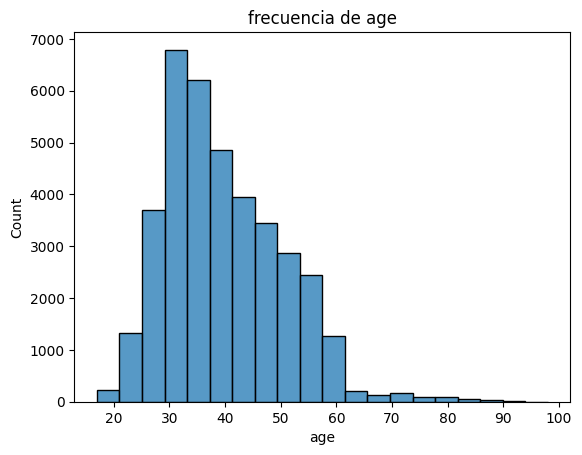

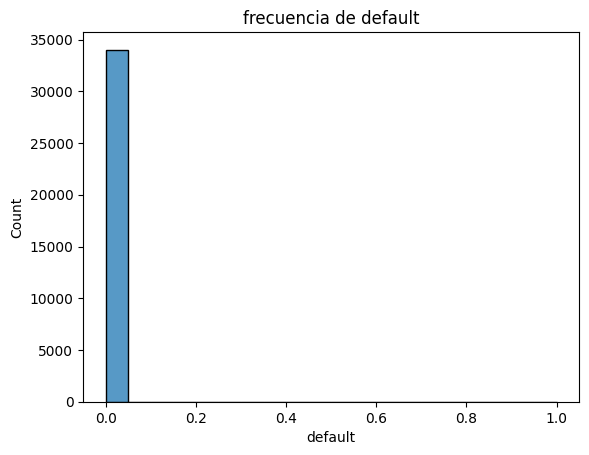

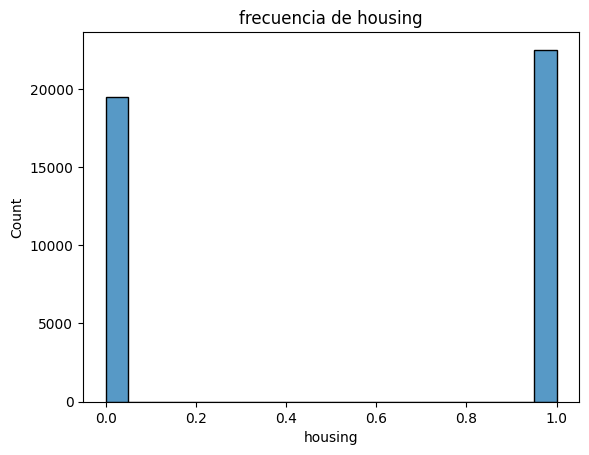

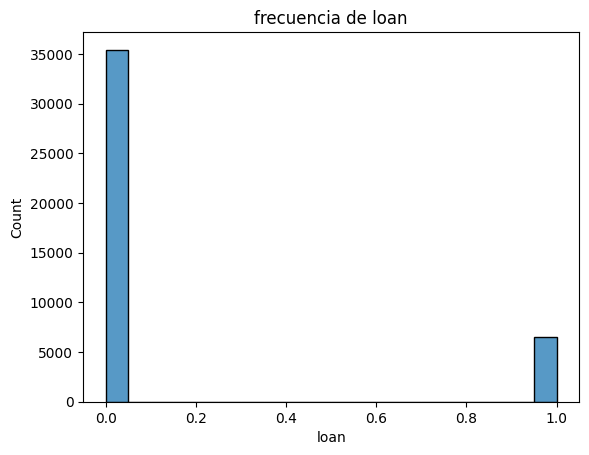

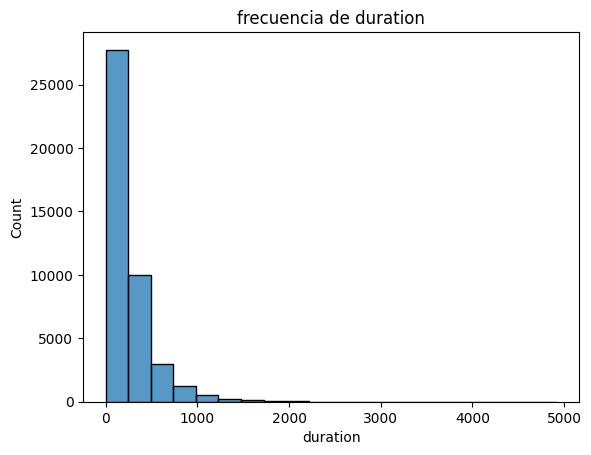

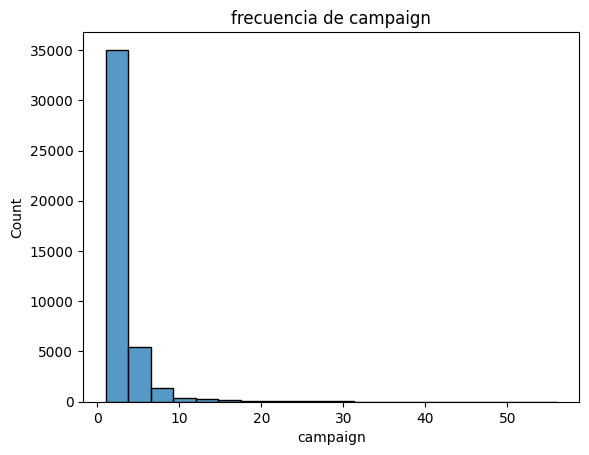

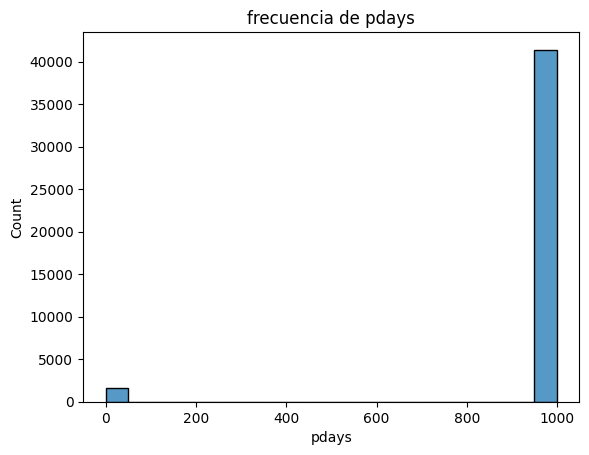

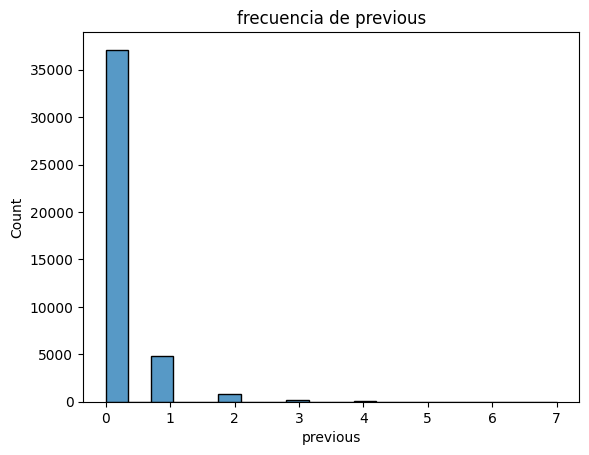

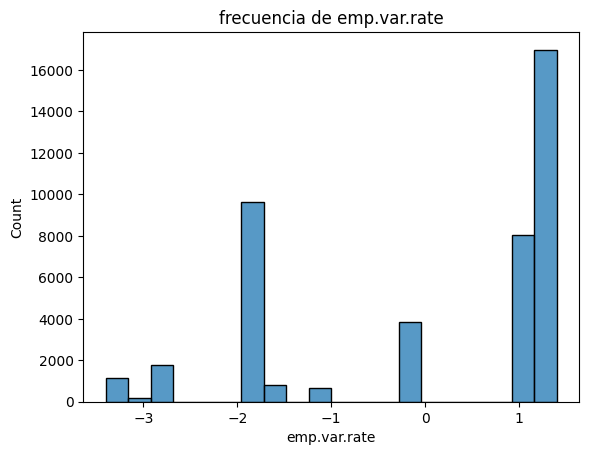

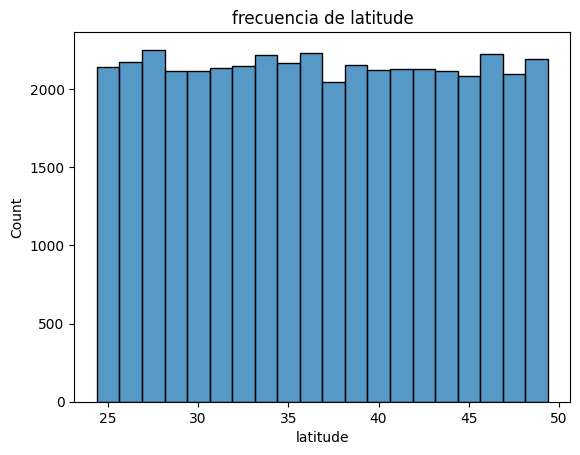

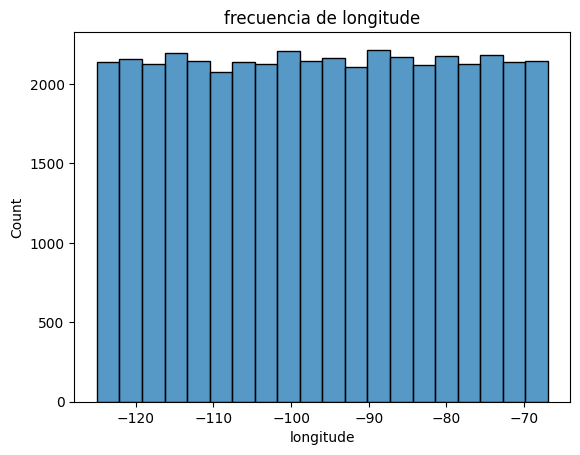

In [11]:
for col in col_numericas:

    plt.figure()
    sns.histplot(df[col], bins=20)
    plt.title(f"frecuencia de {col}")
    plt.show()

## BOXPLOT

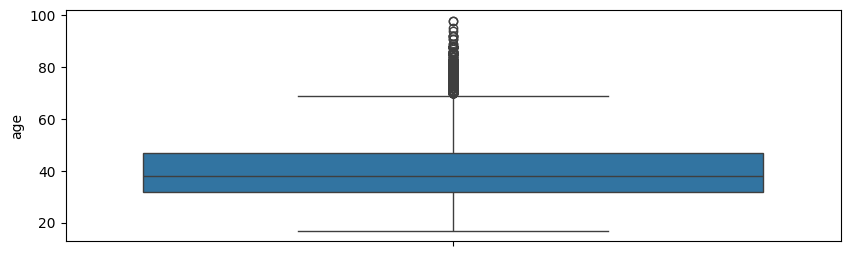

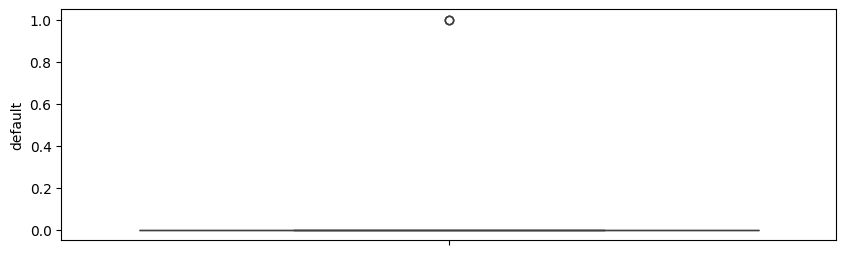

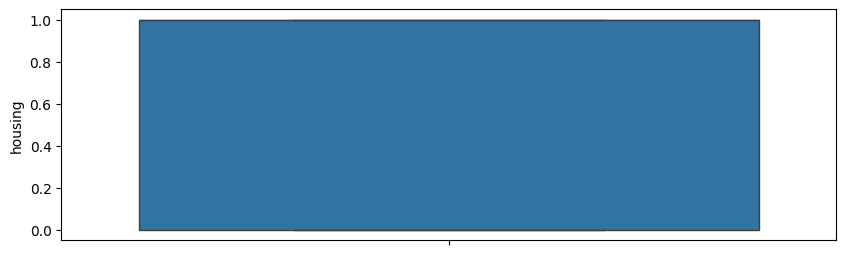

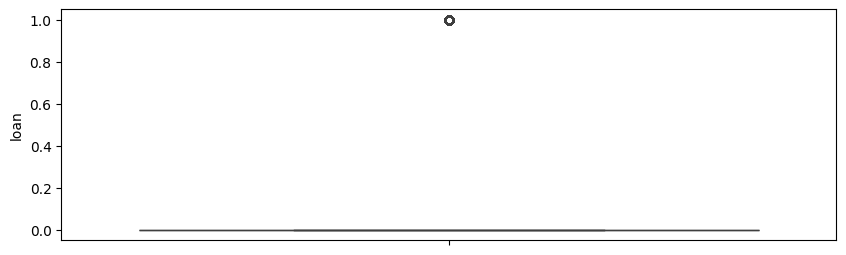

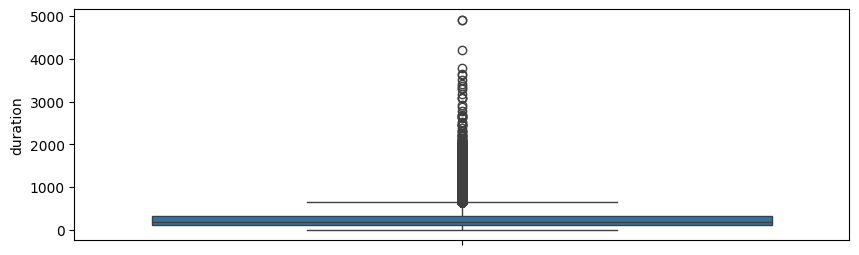

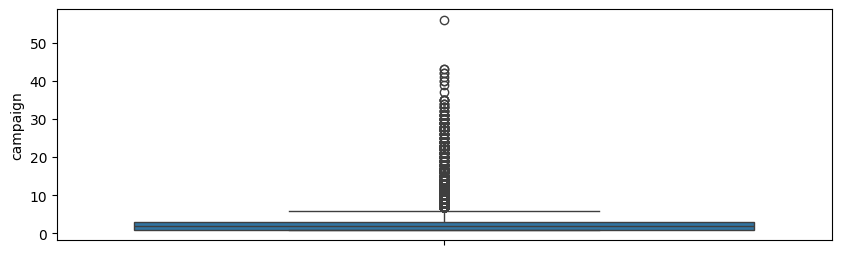

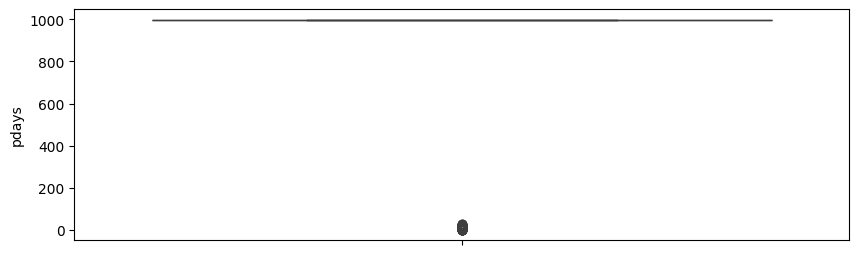

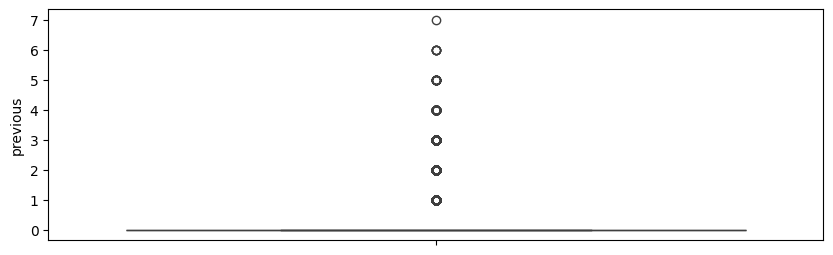

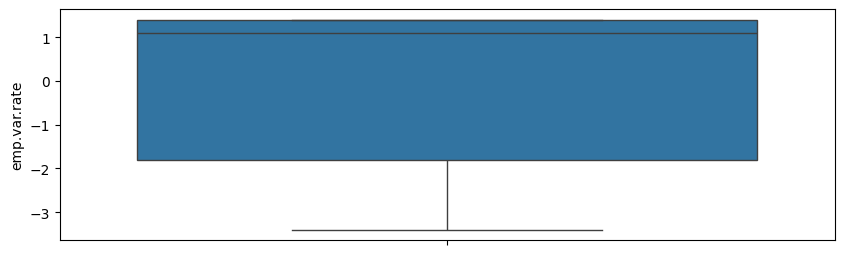

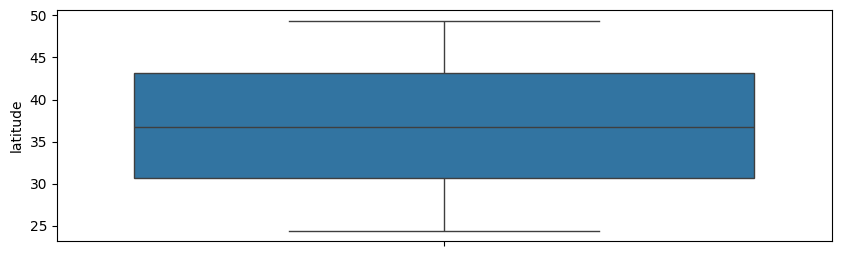

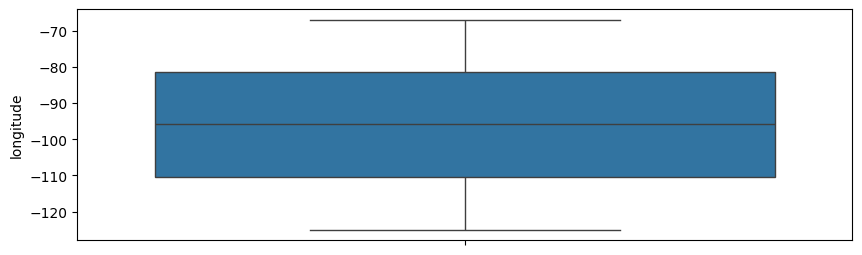

In [12]:
for col in col_numericas:
    plt.figure(figsize=(10,3))
    sns.boxplot(df[col])
    plt.show()

## COLUMNAS CATEGORICAS
- job: parece estar ok, 11 distintas ocupaciones
- marital: parece estar ok, 3 distintos estados civiles
- education: 7 distintos tipos de educacion
- contact: parece un dato irrelevante para el estudio
- poutcome: no nos da mucha infirmacion, tenemos 90% de datos sin informacion
- cons.price.idx: es una columna numerica, cambiar , por .
- cons.conf.idx: es una columna numerica, cambiar , por .
- euribor3m: es una columna numerica, cambiar , por .
- nr.employed: es una columna numerica, cambiar , por .
- y: parece estar ok, mayor cantidad de clientes que no adquirieron el servicio
- date: cambiar a fecha datetime 
- id_: esta ok ningun duplicado

In [13]:
col_categoricas = df.select_dtypes(['object','category']).columns
col_categoricas

Index(['job', 'marital', 'education', 'contact', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'date', 'id_'],
      dtype='object')

In [14]:
for col in col_categoricas:
    print(f'la columna {col} tiene un total de {df[col].nunique()} valores distintos')

    print('los 10 valores mas repetidos son:')
    display(df[col].value_counts(dropna=False).head(10))

la columna job tiene un total de 11 valores distintos
los 10 valores mas repetidos son:


job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
Name: count, dtype: int64

la columna marital tiene un total de 3 valores distintos
los 10 valores mas repetidos son:


marital
MARRIED     25999
SINGLE      12105
DIVORCED     4811
NaN            85
Name: count, dtype: int64

la columna education tiene un total de 7 valores distintos
los 10 valores mas repetidos son:


education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
NaN                     1807
illiterate                18
Name: count, dtype: int64

la columna contact tiene un total de 2 valores distintos
los 10 valores mas repetidos son:


contact
cellular     27396
telephone    15604
Name: count, dtype: int64

la columna poutcome tiene un total de 3 valores distintos
los 10 valores mas repetidos son:


poutcome
NONEXISTENT    37103
FAILURE         4461
SUCCESS         1436
Name: count, dtype: int64

la columna cons.price.idx tiene un total de 26 valores distintos
los 10 valores mas repetidos son:


cons.price.idx
93,994    7938
93,918    6937
92,893    5985
93,444    5349
94,465    4522
93,2      3731
93,075    2552
92,201     803
92,963     742
NaN        471
Name: count, dtype: int64

la columna cons.conf.idx tiene un total de 26 valores distintos
los 10 valores mas repetidos son:


cons.conf.idx
-36,4    8020
-42,7    7004
-46,2    6057
-36,1    5408
-41,8    4568
-42      3782
-47,1    2581
-31,4     815
-40,8     748
-26,9     477
Name: count, dtype: int64

la columna euribor3m tiene un total de 309 valores distintos
los 10 valores mas repetidos son:


euribor3m
NaN      9256
4,857    2287
4,962    2124
4,963    2019
4,961    1594
4,964     964
4,856     961
1,405     954
4,864     871
4,965     866
Name: count, dtype: int64

la columna nr.employed tiene un total de 11 valores distintos
los 10 valores mas repetidos son:


nr.employed
5228,1    16980
5099,1     8937
5191       8020
5195,8     3830
5076,2     1748
5017,5     1133
4991,6      812
5008,7      683
4963,6      665
5023,5      181
Name: count, dtype: int64

la columna y tiene un total de 2 valores distintos
los 10 valores mas repetidos son:


y
no     38156
yes     4844
Name: count, dtype: int64

la columna date tiene un total de 1825 valores distintos
los 10 valores mas repetidos son:


date
NaN                   248
28-febrero-2018        95
28-febrero-2016        94
28-febrero-2015        92
28-febrero-2017        89
28-febrero-2019        85
30-abril-2018          58
30-septiembre-2017     56
30-noviembre-2017      55
30-junio-2015          55
Name: count, dtype: int64

la columna id_ tiene un total de 43000 valores distintos
los 10 valores mas repetidos son:


id_
089b39d8-e4d0-461b-87d4-814d71e0e079    1
c25b5d31-bb7e-41af-898d-42bf3e479351    1
bfd6bad9-f23a-445a-838e-10ee90110534    1
075b0e72-b5e3-43f4-90cd-29f9090b2b1a    1
482a2d86-c9f0-46b7-9f6f-82c769690d48    1
bd44bc07-8e26-4ccc-9a40-bdeba76fc052    1
3cf9f0b3-f64d-4ea9-87d7-5340773ae674    1
9843449e-d8c4-4170-9fda-d963d0ff43c7    1
b6f8e56b-3ea7-43d7-94d1-a590dfb38d71    1
41a3101d-26d3-4ef2-8a0a-b870beeeaeb2    1
Name: count, dtype: int64

## COUNTPLOT

Distribucion de la columna job


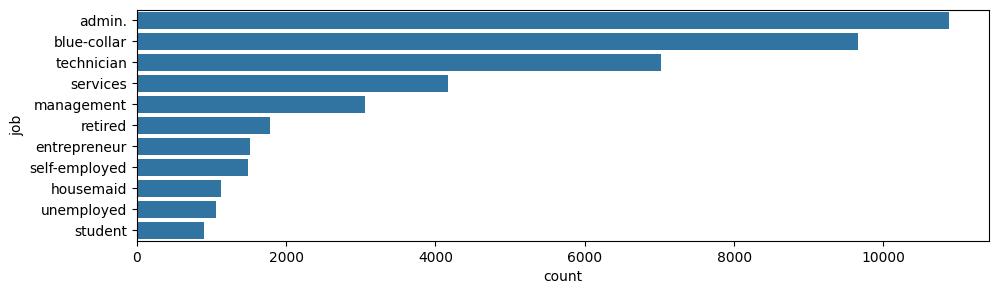

Distribucion de la columna marital


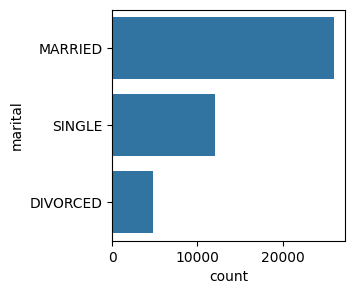

Distribucion de la columna education


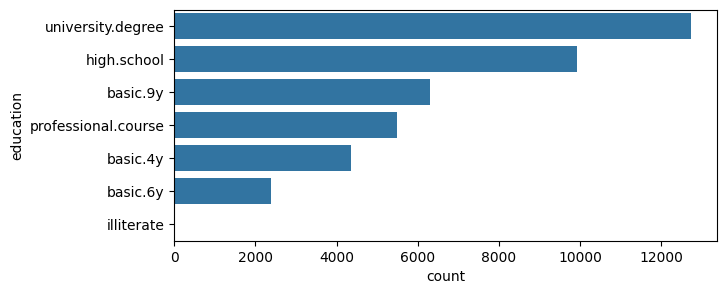

Distribucion de la columna contact


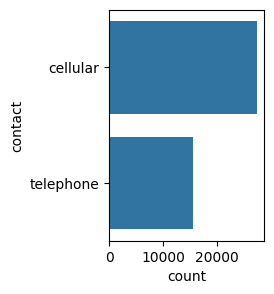

Distribucion de la columna poutcome


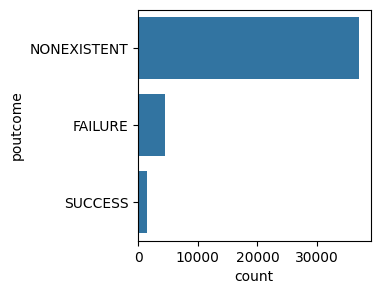

Distribucion de la columna cons.price.idx


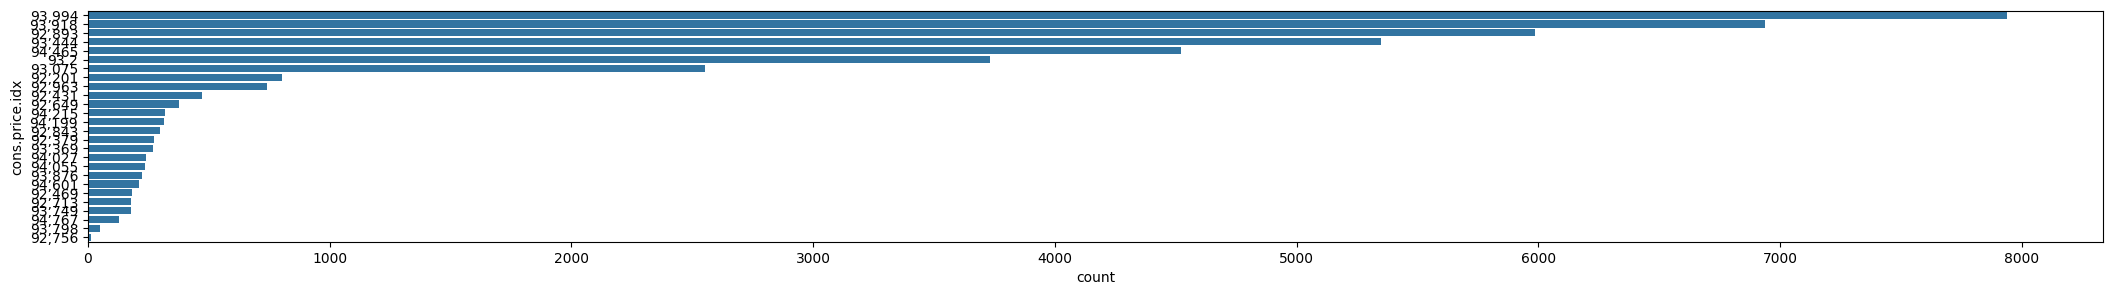

Distribucion de la columna cons.conf.idx


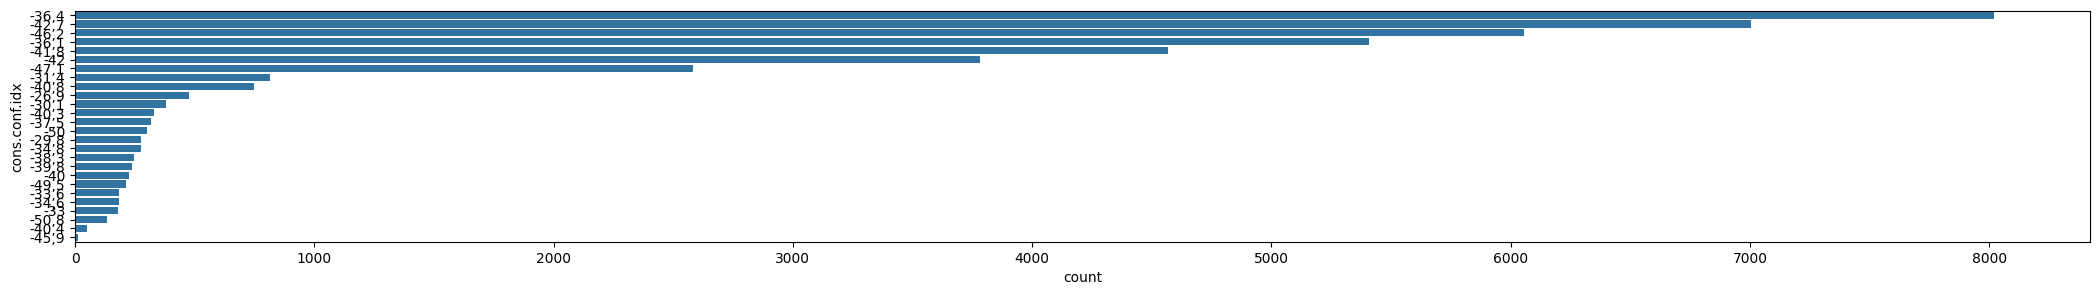

Distribucion de la columna nr.employed


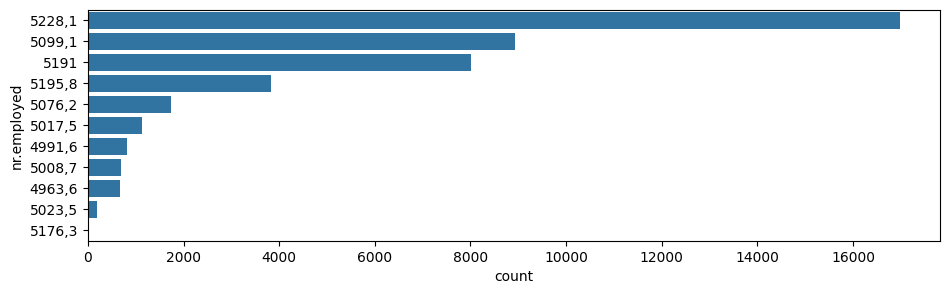

Distribucion de la columna y


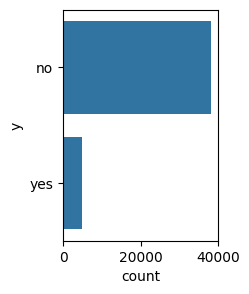

In [15]:
for col in col_categoricas:


    if df[col].nunique() > 200:
        continue

    print(f'Distribucion de la columna {col}')
    plt.figure(figsize= (df[col].nunique(), 3))
    sns.countplot(df[col], order=df[col].value_counts().index)
    plt.show()